# Estatística - "Testes de Hipóteses"

Bibliotecas:

In [152]:
# Bibliotecas-base
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

# Biblioteca para estatística
import scipy.stats as stat
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kstest, norm

In [153]:
import warnings as ws
ws.filterwarnings('ignore')

In [154]:
!pip freeze > requirements.txt

#### Parte I - "Teste A/B"

Importando o dataset `experimento_teste_ab.csv`:

In [155]:
teste_ab = pd.read_csv('/content/drive/MyDrive/Exercício/experimento_teste_ab.csv')

Conhecendo a base de dados:

In [156]:
teste_ab.shape

(2000, 4)

In [157]:
teste_ab.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [158]:
teste_ab.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


In [159]:
teste_ab.describe(include=['object'])

,Versão_Página
count,2000
unique,2
top,A
freq,1000


In [160]:
teste_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


#####1.Qual dos cenários tem a maior taxa de conversão?

Foi realizado uma análise descritiva para calcular e comparar as taxas de conversão entre as diferentes versões da página (A e B).
Identificou-se as versões únicas da página e para cada versão, calculou o total de conversões e o total de visualizações.
Calculou a taxa de conversão dividindo o total de conversões pelo total de visualizações e multiplicou por 100.
Compararou as taxas de conversão calculadas para determinar qual versão teve a maior taxa.


In [161]:
# Encontra valores únicos para Versão_Página
versoes_unicas = teste_ab['Versão_Página'].unique()

# Dicionário para armazenar os resultados para cada versão da página
resultados = {}

# Inicializa valores
maior_taxa = 0
versao_pagina = ''

for versao in versoes_unicas:
    # Filtra o dataframe para cada Versão_Página
    teste_ab_versao = teste_ab[teste_ab['Versão_Página'] == versao]

    # Calcula o total de conversões e visualizações
    total_conversao    = teste_ab_versao['Conversões'].sum()
    total_visualizacao = teste_ab_versao['Visualizações'].sum()

    # Calcula a taxa de conversão
    taxa_conversao = (total_conversao / total_visualizacao) * 100

    # Armazena os resultados no dicionário
    resultados[versao] = {'Total_Conversao': total_conversao,
                          'Total_Visualizacao': total_visualizacao,
                          'Taxa_Conversao': round(taxa_conversao, 2)}

    # Valida maior Taxa de Conversão
    if (taxa_conversao > maior_taxa):
        maior_taxa    = round(taxa_conversao, 2)
        versao_pagina = versao

# Resultados
for versao, resultado in resultados.items():
    print(f"Versão {versao}")
    print(f"Total de conversões   : {resultado['Total_Conversao']}")
    print(f"Total de visualizações: {resultado['Total_Visualizacao']}")
    print(f"Taxa de conversão (%) : {resultado['Taxa_Conversao']}")
    print()

print(f"A versão {versao_pagina} apresentou a maior taxa de conversão, atingindo {maior_taxa}%.")

Versão A
Total de conversões   : 105
Total de visualizações: 150835
Taxa de conversão (%) : 0.07

Versão B
Total de conversões   : 125
Total de visualizações: 150676
Taxa de conversão (%) : 0.08

A versão B apresentou a maior taxa de conversão, atingindo 0.08%.


**Conclusão:**

Com base na análise descritiva das taxas de conversão, a Versão B apresentou a maior taxa de conversão, atingindo 0.08%, em comparação com a Versão A, que teve uma taxa de 0.07%. Isso sugere que, neste experimento, a Versão B teve um desempenho ligeiramente melhor em termos de conversões por visualização.

#####2.Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

* O cenário A, da base, como o inicial, que funciona hoje.
* Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
* Também considere 80% de certeza de conseguir capturar o efeito da nova abordagem.
* O aumento para 10% de conversão.

Foi utilizado cálculos estatísticos para determinar o tamanho da amostra, o que é uma etapa de planejamento para um teste de hipótese futuro (o teste A/B). Esses cálculos utilizam fórmulas estatísticas que incorporam conceitos como z-scores associados aos níveis de confiança e poder, bem como a diferença esperada nas taxas de conversão (delta) e a variância.

In [162]:
# Cria dataframe separado para o cenário A
teste_ab_A = teste_ab[teste_ab['Versão_Página'] == 'A']

# Taxa de conversão ideal (10%)
taxa_conversao_ideal = 0.10

# Taxa de conversão atual
total_conversao      = teste_ab_A['Conversões'].sum()
total_visualizacao   = teste_ab_A['Visualizações'].sum()
taxa_conversao_atual = total_conversao / total_visualizacao

# Delta: diferença entre a taxa de conversão ideal e a atual
delta = taxa_conversao_ideal - taxa_conversao_atual

# Nível de confiança (1 - alpha)
confianca = 0.95

# Nível de significância (alpha)
alpha = 0.05

# Z-score correspondente ao nível de confiança (1 - alpha/2)
z_alpha = stat.norm.ppf(1 - alpha/2)
print(f'Valor de Zα: {z_alpha:.2f}')

# Poder estatístico (80%) (beta)
beta = 0.80

# Z-score correspondente ao poder estatístico (1 - beta)
z_beta = stat.norm.ppf(1 - (1 - beta))
print(f'Valor de Zβ: {z_beta:.2f}')

# Variância amostral para o cenário A
variancia_amostral_A = teste_ab.groupby('Versão_Página')['Conversões'].sum().var()
print(f'Valor de Variância amostral: {variancia_amostral_A}')

# Tamanho da amostra necessário
n = (2 * (variancia_amostral_A) * (z_alpha + z_beta)**2) / delta**2

# Arredondando para o próximo número inteiro
tamanho_amostra_necessario = round(n)

print("Tamanho da amostra necessário:", tamanho_amostra_necessario)

Valor de Zα: 1.96
Valor de Zβ: 0.84
Valor de Variância amostral: 200.0
Tamanho da amostra necessário: 318372


**Conclusão:**

Com base nos critérios especificados (cenário A como inicial, 95% de confiança, nível de significância de 5%, 80% de poder estatístico e um aumento esperado de 10% na conversão), o tamanho da amostra necessário para o desenvolvimento de um teste A/B é de aproximadamente **318.372**.

Este cálculo indica que para ter uma alta probabilidade de detectar uma diferença de 10% na taxa de conversão, caso ela realmente exista, seria preciso coletar dados de cerca de 318.372 visitantes em cada grupo (Versão A e Versão B) do teste A/B.

####Parte II - "População"

Importando o dataset  `pacientes.csv`:

In [163]:
pacientes = pd.read_csv('/content/drive/MyDrive/Exercício/pacientes.csv')

Conhecendo a base de dados:

In [164]:
pacientes.shape

(1000, 9)

In [165]:
pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [166]:
pacientes.describe()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [167]:
pacientes.describe(include=['object'])

,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
count,1000,1000,1000
unique,2,4,2
top,Feminino,Afro-americano,Com condições de saúde adicionais
freq,503,260,510


In [168]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [169]:
# Verifica valores únicos das variáveis categóricas
for column in pacientes.select_dtypes(include=['object']).columns:
  unique_values = pacientes[column].unique()
  print(f"Valores únicos da coluna {column}: {unique_values}")

Valores únicos da coluna Nome_Genero: ['Feminino' 'Masculino']
Valores únicos da coluna Nome_Etnia: ['Afro-americano' 'Asiático' 'Hispânico' 'Caucasiano']
Valores únicos da coluna Nome_Estado_Saude: ['Com condições de saúde adicionais' 'Saudável']


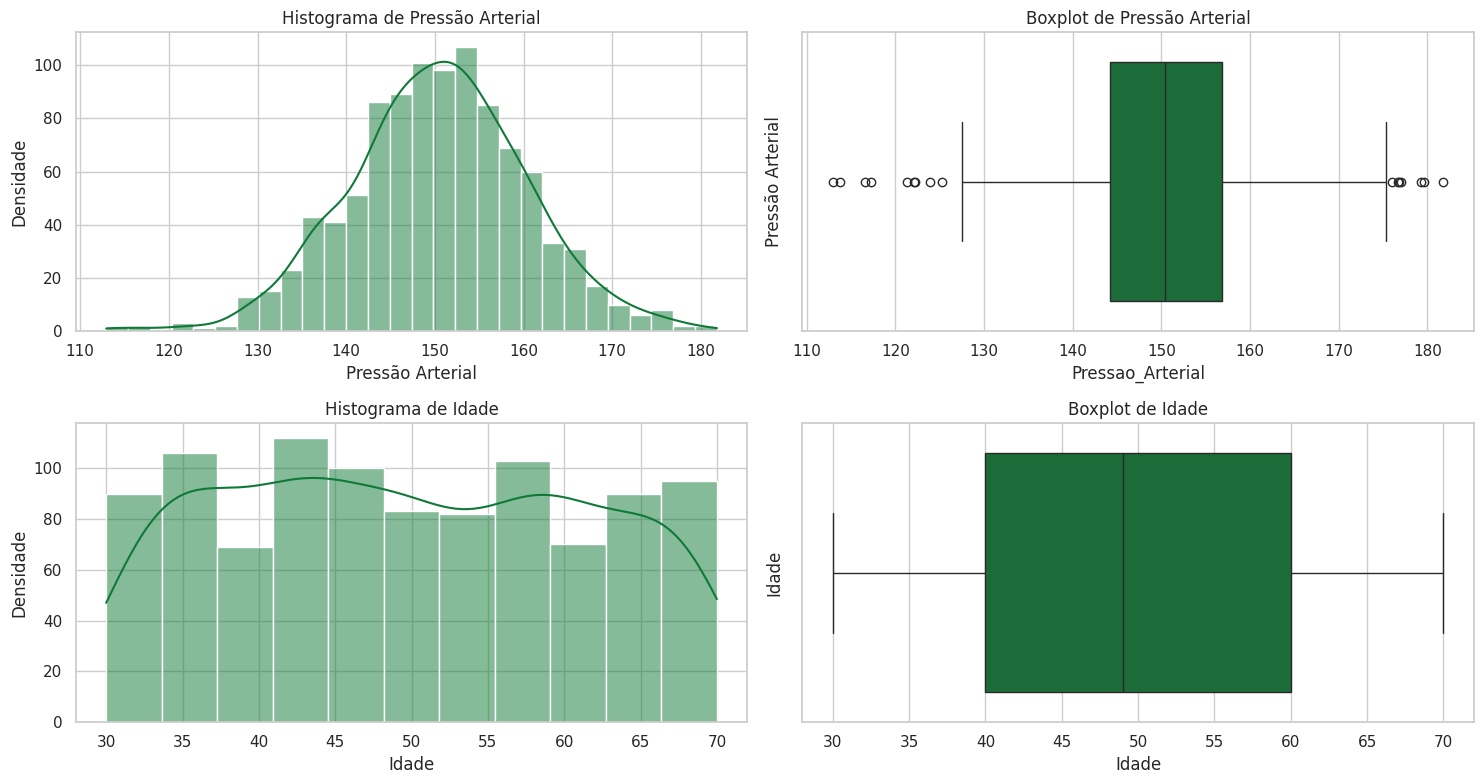

<Figure size 640x480 with 0 Axes>

In [170]:
# Histogramas e boxplots
categorias = {'Pressao_Arterial': 'Pressão Arterial',
              'Idade': 'Idade'}

plt.figure(figsize=(15, 8))
sns.set_theme(style='whitegrid')

for i, (coluna, nome) in enumerate(categorias.items(), 1):
  # Histograma
  plt.subplot(2, 2, 2*i-1)
  sns.histplot(pacientes[coluna], kde=True, color='#0f7937')
  plt.title(f'Histograma de {nome}')
  plt.xlabel(nome)
  plt.ylabel('Densidade')

  # Boxplot
  plt.subplot(2, 2, 2*i)
  sns.boxplot(data=pacientes, x=coluna, color='#0f7937')
  plt.title(f'Boxplot de {nome}')
  plt.ylabel(nome)

plt.tight_layout()
plt.show()
plt.savefig('histograma_boxplot_pressao_arterial.png')

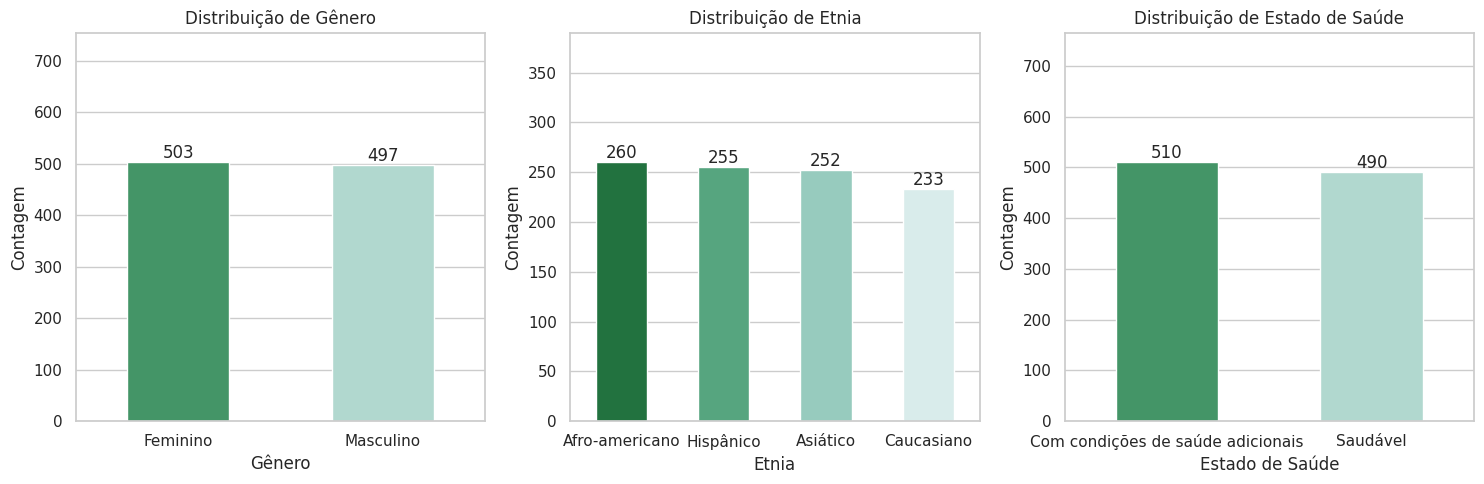

<Figure size 640x480 with 0 Axes>

In [171]:
# Gráficos de Barras
categorias = {'Nome_Genero': 'Gênero',
              'Nome_Etnia': 'Etnia',
              'Nome_Estado_Saude': 'Estado de Saúde'}

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15, 5))

for i, coluna in enumerate(categorias.items(), 1):
  plt.subplot(1, 3, i)
  sns.barplot(x=pacientes[coluna[0]].value_counts().index,
              y=pacientes[coluna[0]].value_counts(),
              hue=pacientes[coluna[0]].value_counts().index,
              width=0.5,
              palette="BuGn_r")
  # Título
  plt.title(f'Distribuição de {coluna[1]}')
  plt.xlabel(coluna[1])
  plt.ylabel('Contagem')
  plt.ylim(0, pacientes[coluna[0]].value_counts().max() * 1.5)

  # Valores em cima das barras
  for index, value in enumerate(pacientes[coluna[0]].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.savefig('distribuicao_gen_etnia_saude.png')

####Verifique a base  `pacientes.csv` (os dados são fictícios). Ao sintetizar uma base de dados de um hospital que trata de pacientes com problemas cardíacos e  considerando a mesma base como a população, concluí-se que as estatísticas da população são conhecidas. Responda as perguntas abaixo:

Ao longo das análises o teste t foi escolhido por se tratar da ferramenta estatística  mais adequada para amostras independentes, ele ajuda a determinar se a diferença observada nas médias das amostras é estatisticamente significativa ou se poderia ter ocorrido por acaso.

#####3.Considerando uma amostra de 45 números que representam o index do dataframe, `índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,146, 505, 273, 957, 362]`). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [172]:
# Índices da amostra
indices = [909, 751, 402, 400, 726,  39, 184, 269, 255, 769, 209, 715, 677, 381,
           793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,
            89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505,
           273, 957, 362]

# Selecionando a amostra do dataframe
df_amostra = pacientes.loc[indices].sort_index()

# Filtrando pela coluna Idade
amostra_idade = df_amostra['Idade']

# Aplicando teste t-Student
teste_t, p_valor = stat.ttest_1samp(amostra_idade, 50)

# Definindo o nível de significância (alpha)
alpha = 0.05

# Comparando o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
               "Podemos concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
               "Não há evidências suficientes para concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.

p-valor: 0.96


**Conclusão:**

Com base nos resultados do teste t de uma amostra, onde o p-valor (0.96) foi maior que o nível de significância (alpha = 0.05), não há evidências estatisticamente significativas para rejeitar a hipótese nula.

Isso significa que, com 96% de confiança, não podemos concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos, com base nesta amostra específica. A média de idade observada na amostra não é significativamente diferente de 50 anos ao nível de significância de 5%.

#####4.Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [173]:
# Cria dataframe para pessoas com condições adicionais:
condicoes_adicionais = pacientes[pacientes['Nome_Estado_Saude'] != 'Saudável']

# Cria dataframe para pessoas saudáveis:
pessoas_saudaveis = pacientes[pacientes['Nome_Estado_Saude'] == 'Saudável']

# Exemplo de verificação de correlação entre a idade de pessoas com condições adicionais e pessoas saudáveis:

# Calcula a correlação entre as idades dos dois grupos
correlacao = condicoes_adicionais['Idade'].corr(pessoas_saudaveis['Idade'])

# Se a correlação for baixa (próxima de 0), as amostras são independentes.

# Outra maneira de ilustrar a independência é verificar se a média da idade de um grupo é influenciada pela média da idade do outro grupo.

media_idade_condicoes = condicoes_adicionais['Idade'].mean()
media_idade_saudaveis = pessoas_saudaveis['Idade'].mean()

print(f"Média da idade das pessoas com condições adicionais: {media_idade_condicoes:.2f}")
print(f"Média da idade das pessoas saudáveis: {media_idade_saudaveis:.2f}")

Média da idade das pessoas com condições adicionais: 49.83
Média da idade das pessoas saudáveis: 49.68


**Conclusão:**

As amostras seriam independentes.  Pessoas com condições de saúde adicionais e pessoas saudáveis são grupos distintos.

A presença de uma condição em um indivíduo não afeta a probabilidade de outro indivíduo ter ou não uma condição.

Se a alteração da média da idade de um grupo não influenciar a média da idade do outro grupo, as amostras são independentes.

No entanto, é importante notar que a independência das amostras não significa que não haja diferenças entre os dois grupos, ou que não existam outras
variáveis que possam afetar os dados coletados.

#####5.Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, `índices = ([690, 894, 67, 201, 364, 19, 60, 319,588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354,966, 943, 372])`, podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [174]:
'''
'''
# Índices da amostra
indices = [690, 894, 67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174,
           105, 693,  6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Seleciona a amostra do dataframe
df_amostra = pacientes.loc[indices].sort_index()

# Filtra pela coluna Estado_Saude
amostra_condicao_0 = df_amostra[df_amostra['Estado_Saude'] == 0]
amostra_condicao_1 = df_amostra[df_amostra['Estado_Saude'] == 1]

# Calcula média da pressão arterial
media_pressao_0 = amostra_condicao_0['Pressao_Arterial'].mean()
media_pressao_1 = amostra_condicao_1['Pressao_Arterial'].mean()

# Aplica teste t para duas amostras independentes
teste_t, p_valor = stat.ttest_ind(amostra_condicao_1['Pressao_Arterial'],
                                  amostra_condicao_0['Pressao_Arterial'])

# Nível de significância (alpha)
alpha = 0.06

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.\n")

# Resultados
print(f"Média de pressão arterial para pacientes com condições de saúde adicionais: {round(media_pressao_1, 2)}")
print(f"Média de pressão arterial para pacientes sem condições de saúde adicionais: {round(media_pressao_0, 2)}")
print(f"\nConclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Média de pressão arterial para pacientes com condições de saúde adicionais: 153.2
Média de pressão arterial para pacientes sem condições de saúde adicionais: 152.94

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.

p-valor: 0.94


**Conclusão:**

Com base nos resultados do teste t para amostras independentes, onde o p-valor (0.94) foi maior que o nível de significância (alpha = 0.06), não há evidências estatisticamente significativas para rejeitar a hipótese nula.

Isso significa que, com 94% de confiança, não podemos concluir que existe uma diferença significativa na pressão arterial média entre pacientes com condições de saúde adicionais e pacientes sem condições adicionais de saúde, com base nesta amostra específica. As médias de pressão arterial observadas nos dois grupos (aproximadamente 153.20 para pacientes com condições adicionais e 152.94 para pacientes sem condições adicionais) não são diferentes o suficiente para serem consideradas estatisticamente distintas ao nível de significância de 6%.

#####6.Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

In [175]:
# Valores únicos para coluna Etnia
valores_unicos = pacientes['Nome_Etnia'].unique()

# Dividindo o conjunto de dados em diferentes grupos étnicos
grupos_etnicos = [pacientes[pacientes['Nome_Etnia'] == etnia]['Pressao_Arterial'] for etnia in valores_unicos]

# Calculando médias dos grupos étnicos
medias_por_grupo_etnico = {nome_etnia: grupo.mean() for nome_etnia, grupo in zip(valores_unicos, grupos_etnicos)}

# Aplicando teste ANOVA
teste_anova, p_valor = stat.f_oneway(*grupos_etnicos)

# Nível de significância (alpha)
alpha = 0.05

# Comparando o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
               "Podemos concluir que existe uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos desta população.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
               "Não há evidências suficientes para concluir que exista uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.\n")

# Resultados
print("Pressão arterial média por grupo étnico:")
for nome_etnia, media in medias_por_grupo_etnico.items():
  print(f"- {nome_etnia.capitalize()}: {round(media, 2)}")

print(f"\nConclusão: {conclusao}\np-valor: {round(p_valor, 2)}")


Pressão arterial média por grupo étnico:
- Afro-americano: 150.73
- Asiático: 150.33
- Hispânico: 150.42
- Caucasiano: 149.98

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que exista uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.

p-valor: 0.87


b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população.

*I. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.*

*II. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.*

In [176]:
# Separa os dados do dataframe pelas colunas Idade e Pressao_Arterial
df_idade            = pacientes['Idade']
df_pressao_arterial = pacientes['Pressao_Arterial']

# Tabela de contingência
tabela_contingencia = pd.crosstab(df_idade, df_pressao_arterial)

# Aplica teste qui-quadrado
chi2, p_valor, _, _ = stat.chi2_contingency(tabela_contingencia)

# Nível de significância (alpha)
alpha = 0.05

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que a idade dos pacientes está associada à sua pressão arterial.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que a idade dos pacientes está associada à sua pressão arterial.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}\nQui-quadrado: {chi2}")

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que a idade dos pacientes está associada à sua pressão arterial.

p-valor: 0.44
Qui-quadrado: 40000.0


**Conclusão:**

Com base nos resultados do teste ANOVA, onde o p-valor (0.87) foi maior que o nível de significância (alpha = 0.05), não há evidências estatisticamente significativas para rejeitar a hipótese nula (H0).

Isso significa que, com 87% de confiança, não podemos concluir que exista uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população, com base nesta análise. As médias de pressão arterial observadas nos diferentes grupos étnicos (Afro-americano: 150.73, Asiático: 150.33, Hispânico: 150.42, Caucasiano: 149.98) não são diferentes o suficiente para serem consideradas estatisticamente distintas ao nível de significância de 5%.

Portanto, não há suporte para a hipótese alternativa (H1) de que há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

#####7.Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

O teste qui-quadrado é usado  para determinar se existe uma associação estatisticamente significativa entre duas variáveis categóricas, ele também compara as frequências esperadas (as frequências que seriam esperadas se não houvesse associação entre as variáveis). Uma grande diferença entre as frequências observadas e esperadas leva a um valor de qui-quadrado alto e, potencialmente, a um p-valor baixo, sugerindo que a associação observada não é aleatória.

In [177]:
# Separa os dados do dataframe pelas colunas Genero e Estado_Saude
df_genero       = pacientes['Genero']
df_estado_saude = pacientes['Estado_Saude']

# Tabela de contingência
tabela_contingencia = pd.crosstab(df_genero, df_estado_saude)

# Aplica teste qui-quadrado
chi2, p_valor, _, _ = stat.chi2_contingency(tabela_contingencia)

# Nível de significância (alpha)
alpha = 0.05

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}\nQui-quadrado: {chi2}")


Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.

p-valor: 1.0
Qui-quadrado: 0.0


**Conclusão:**

Com base nos resultados do teste qui-quadrado, onde o p-valor (1.0) foi maior que o nível de significância (alpha = 0.05), não há evidências estatisticamente significativas para rejeitar a hipótese nula.

Isso significa que, com 100% de confiança, não podemos concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população, com base nesta análise. O valor do qui-quadrado (0.0) sugere que não há diferença observada entre as frequências esperadas e as frequências observadas na tabela de contingência, indicando que as variáveis Gênero e Estado de Saúde são independentes nesta população.

#####8.Existe uma associação entre a idade dos pacientes e sua pressão arterial?

* Hipótese Nula (H0): se a pressão arterial é independente da idade.

* Hipótese Alternativa (H1): a pressão arterial esta associada a idade.

In [178]:
idades = pacientes['Idade']
pressoes_arteriais = pacientes['Pressao_Arterial']

faixas_etarias = [30, 40, 50, 60, 70, 80]
intervalos_pressao = [100, 120, 140, 160, 180, 200]

# Contar o número de pacientes em cada faixa etária e intervalo de pressão arterial
contagem_idades = np.histogram(idades, bins=faixas_etarias)[0]
contagem_pressao = np.histogram(pressoes_arteriais, bins=intervalos_pressao)[0]

# Criar tabela de contingência
tabela_contingencia = np.array([contagem_idades, contagem_pressao])

# Realizar o teste qui-quadrado de independência
statistic, p_value, dof, expected = chi2_contingency(tabela_contingencia)
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Rejeitamos a hipótese nula


**Conclusão:**

Com base nos resultados do teste qui-quadrado de independência, onde o p-valor (0.0) foi menor que o nível de significância (alpha = 0.05), rejeitamos a hipótese nula.

Isso significa que há evidências estatisticamente significativas para concluir que existe uma associação entre a idade dos pacientes e sua pressão arterial nesta população. A pressão arterial não é independente da idade; elas estão relacionadas. O alto valor da estatística qui-quadrado (aproximadamente 524.21) e o p-valor muito baixo reforçam essa conclusão, indicando que a relação observada não é aleatória.

#####9.Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%).

O cálculo do intervalo de confiança envolve o uso do z-score (norm.ppf) associado ao nível de confiança desejado (95%). O z-score é derivado da distribuição normal padrão e é usado aqui porque estamos lidando com a média de uma amostra e queremos estimar o intervalo onde a verdadeira média da população provavelmente se encontra.

Portanto, embora não seja um teste de hipótese tradicional, o cálculo do intervalo de confiança baseia-se em princípios estatísticos relacionados à distribuição normal e à estimativa de parâmetros populacionais a partir de dados amostrais.

In [179]:
parcial = pacientes[['Nome_Estado_Saude', 'Pressao_Arterial']]

pressoes_arteriais_condicoes = parcial[parcial['Nome_Estado_Saude'] != 'Saudável']['Pressao_Arterial']

media_pressao_condicoes = np.mean(pressoes_arteriais_condicoes)
desvio_padrao_pressao_condicoes = np.std(pressoes_arteriais_condicoes)

n = len(pressoes_arteriais_condicoes)

nivel_confianca = 0.95

z = norm.ppf((1 + nivel_confianca)/2)

#calcular o intervalo de confinça
intervalo_confianca = z * (desvio_padrao_pressao_condicoes / np.sqrt(n))

limite_inferior = media_pressao_condicoes - intervalo_confianca
limite_superior = media_pressao_condicoes + intervalo_confianca

print(f'limite inferior: {limite_inferior:.2f}')
print(f'limite superior: {limite_superior:.2f}')

limite inferior: 149.22
limite superior: 151.01


**Conclusão:**

Com base nos cálculos realizados, o intervalo de confiança de 95% para a média da pressão arterial entre os pacientes com condições de saúde adicionais é aproximadamente de 149.22 a 151.01.

Isso significa que, com 95% de confiança, podemos estimar que a verdadeira média da pressão arterial para todos os pacientes nesta população que possuem condições de saúde adicionais está dentro deste intervalo.

#####10.A distribuição da pressão arterial na população segue uma distribuição normal?

* Hipótese Nula (H0): A distribuição da pressão arterial na
população segue uma distribuição normal.

* Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

O teste de Kolmogorov-Smirnov (KS) foi utilizado para verificar se a distribuição da pressão arterial na população segue uma distribuição normal. Por ser tratar de um teste não paramétrico é usado para determinar se uma amostra de dados se ajusta a uma distribuição teórica específica, como a distribuição normal. O teste compara a função de distribuição acumulada (FDA) da amostra observada com a FDA da distribuição teórica (neste caso, a distribuição normal), se a diferença máxima entre as duas FDAs for grande, o teste KS indicará que a amostra não se ajusta à distribuição teórica, sendo adequado para testar a normalidade de variáveis contínuas.
Embora existam outros testes de normalidade, como o teste de Shapiro-Wilk, o teste de Kolmogorov-Smirnov é uma opção válida e foi utilizado neste código para avaliar se a distribuição da pressão arterial se desvia significativamente de uma distribuição normal.

In [180]:
pressao_arterial_populacao = pacientes['Pressao_Arterial']

# Realizar o teste KS
statistic, p_value = kstest(pressao_arterial_populacao, 'norm')
print("Estatística do teste KS:", statistic)
print("Valor de p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Estatística do teste KS: 1.0
Valor de p: 0.0
Rejeitamos a hipótese nula


**Conclusão:**

Com base nos resultados do teste de Kolmogorov-Smirnov (KS), onde o p-valor (0.0) foi menor que o nível de significância (alpha = 0.05), rejeitamos a hipótese nula.

Isso significa que há evidências estatisticamente significativas para concluir que a distribuição da pressão arterial na população não segue uma distribuição normal. A distribuição observada é significativamente diferente de uma distribuição normal ao nível de significância de 5%.